# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc1 = sinasc.copy()

In [5]:
sinasc1["cat_lat"] = None

In [6]:
sinasc1.loc[sinasc1["munResLat"] >= -10.5, "cat_lat"] = "-10.50 ou mais"
sinasc1.loc[sinasc1["munResLat"] < -10.5, "cat_lat"] = "Abaixo de -10.50"

In [7]:
sinasc1.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,cat_lat
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.50
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.50
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.50
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.50
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.50


In [8]:
sinasc1 = sinasc1.set_index("cat_lat")

In [9]:
sinasc1.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
cat_lat,,,,,,,,,,,,,,,,,,,,,
Abaixo de -10.50,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
Abaixo de -10.50,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
Abaixo de -10.50,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
Abaixo de -10.50,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
Abaixo de -10.50,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [10]:
mapping = {"Abaixo de -10.50": "A - Abaixo de 10.50",
          "-10.50 ou mais": "B - Abaixo de -10.50"}

In [11]:
sinasc1.groupby(mapping)[["QTDFILMORT", "CONSULTAS"]].aggregate([("soma","sum"), 
                                                                 ("maxímo",max) ,
                                                                 ("mediana",np.median), 
                                                                 ("média","mean"), 
                                                                 ("minimo",min), 
                                                                 ("desvio padrão","std"), 
                                                                 ('variancia',"var")])

QTDFILMORT                                                 
                           soma maxímo mediana     média minimo desvio padrão   
cat_lat                                                                         
A - Abaixo de 10.50      3105.0   28.0     0.0  0.242521    0.0      0.599430  \
B - Abaixo de -10.50     3538.0    9.0     0.0  0.291770    0.0      0.627856   

                               CONSULTAS                                   
                     variancia      soma maxímo mediana     média minimo   
cat_lat                                                                    
A - Abaixo de 10.50   0.359317     48000      9     4.0  3.694297      1  \
B - Abaixo de -10.50  0.394204     48662      9     4.0  3.467436      1   

                                              
                     desvio padrão variancia  
cat_lat                                       
A - Abaixo de 10.50       0.643372  0.413928  
B - Abaixo de -10.50      0.888240  0.788970


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [12]:
sinasc2 = sinasc.copy()

In [13]:
sinasc2["cat_area"] = None

In [14]:
sinasc2.loc[sinasc2["munResArea"] > 3000, "cat_area"] = "acima"
sinasc2.loc[sinasc2["munResArea"] <= 3000, "cat_area"] = "abaixo"

In [15]:
sinasc2 = sinasc2.set_index("cat_area")

In [16]:
mapping = {"acima": "acima de 3000", "abaixo": "3000 ou menos"}

In [17]:
sinasc2.groupby(mapping)[["IDADEMAE", "IDADEPAI"]].aggregate([("soma","sum"), 
                                                                 ("maxímo",max) ,
                                                                 ("mediana",np.median), 
                                                                 ("média","mean"), 
                                                                 ("minimo",min), 
                                                                 ("desvio padrão","std"), 
                                                                 ('variancia',"var")])

IDADEMAE                                                  
                  soma maxímo mediana      média minimo desvio padrão   
cat_area                                                                
3000 ou menos   137389     53    26.0  26.324775     11      6.305535  \
acima de 3000   567848     53    25.0  26.038518     12      6.405497   

                          IDADEPAI                                    
               variancia      soma maxímo mediana      média minimo   
cat_area                                                              
3000 ou menos  39.759775   78074.0   69.0    30.0  31.092792   16.0  \
acima de 3000  41.030387  158424.0   86.0    30.0  31.094014   15.0   

                                        
              desvio padrão  variancia  
cat_area                                
3000 ou menos      7.675474  58.912900  
acima de 3000      7.818364  61.126809

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [18]:
sinasc3 = sinasc.copy()

In [19]:
sinasc3['cat_alt'] = None

In [20]:
sinasc3["munResAlt"].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [21]:
sinasc3.loc[sinasc3["munResAlt"] > 179, 'cat_alt'] = "A"
sinasc3.loc[sinasc3["munResAlt"] <= 179, 'cat_alt'] = "B"                                              

In [22]:
sinasc3['cat_alt'].value_counts()

cat_alt
B    19154
A     7873
Name: count, dtype: int64

In [23]:
sinasc3.set_index("cat_alt")

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
cat_alt,,,,,,,,,,,,,,,,,,,,,
A,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
A,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
A,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
A,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
A,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
A,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
A,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [24]:
idx_map = {"A":"Acima 179", "B":"179 ou menos"}

## Não entendi porque a tabela não apareceu

In [25]:
sinasc3.groupby(idx_map)[["APGAR1", "APGAR5"]].aggregate([("soma","sum"), 
                                                                 ("maxímo",max) ,
                                                                 ("mediana",np.median), 
                                                                 ("média","mean"), 
                                                                 ("minimo",min), 
                                                                 ("desvio padrão","std"), 
                                                                 ('variancia',"var")])

Empty DataFrame
Columns: [(APGAR1, soma), (APGAR1, maxímo), (APGAR1, mediana), (APGAR1, média), (APGAR1, minimo), (APGAR1, desvio padrão), (APGAR1, variancia), (APGAR5, soma), (APGAR5, maxímo), (APGAR5, mediana), (APGAR5, média), (APGAR5, minimo), (APGAR5, desvio padrão), (APGAR5, variancia)]
Index: []

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [26]:
import pandas as pd

url = 'https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia'
dfs = pd.read_html(url)
df_intermediarias = dfs[0]
df_imediatas1 = dfs[1]
df_imediatas2 = dfs[2]

In [27]:
mapping1 = dict()

In [28]:
mapping2= dict()

In [29]:
df_imediatas1

,Região geográfica imediata[1],Código,Municípios
0,Porto Velho,110001,Candeias do Jamari
1,Porto Velho,110001,Guajará-Mirim
2,Porto Velho,110001,Itapuã do Oeste
3,Porto Velho,110001,Nova Mamoré
4,Porto Velho,110001,Porto Velho
5,Ariquemes,110002,Alto Paraíso
6,Ariquemes,110002,Ariquemes
7,Ariquemes,110002,Buritis
8,Ariquemes,110002,Cacaulândia
9,Ariquemes,110002,Campo Novo de Rondônia


In [30]:
df_imediatas2

,Região geográfica imediata[1],Código,Municípios
0,Ji-Paraná,110004,Alvorada d'Oeste
1,Ji-Paraná,110004,Costa Marques
2,Ji-Paraná,110004,Ji-Paraná
3,Ji-Paraná,110004,Mirante da Serra
4,Ji-Paraná,110004,Nova União
5,Ji-Paraná,110004,Ouro Preto do Oeste
6,Ji-Paraná,110004,Presidente Médici
7,Ji-Paraná,110004,São Francisco do Guaporé
8,Ji-Paraná,110004,São Miguel do Guaporé
9,Ji-Paraná,110004,Seringueiras


In [31]:
df_imediatas2.iloc[0,0]

'Ji-Paraná'

In [32]:
for i in range(len(df_imediatas1)):
    mapping1[df_imediatas1.iloc[i,2]] = df_imediatas1.iloc[i,0]

for i in range(len(df_imediatas2)):
    mapping2[df_imediatas2.iloc[i,2]] = df_imediatas2.iloc[i,0]

In [33]:
mapping1

{'Candeias do Jamari': 'Porto Velho',
 'Guajará-Mirim': 'Porto Velho',
 'Itapuã do Oeste': 'Porto Velho',
 'Nova Mamoré': 'Porto Velho',
 'Porto Velho': 'Porto Velho',
 'Alto Paraíso': 'Ariquemes',
 'Ariquemes': 'Ariquemes',
 'Buritis': 'Ariquemes',
 'Cacaulândia': 'Ariquemes',
 'Campo Novo de Rondônia': 'Ariquemes',
 'Cujubim': 'Ariquemes',
 'Monte Negro': 'Ariquemes',
 'Rio Crespo': 'Ariquemes',
 'Governador Jorge Teixeira': 'Jaru',
 'Jaru': 'Jaru',
 "Machadinho d'Oeste": 'Jaru',
 'Theobroma': 'Jaru',
 'Vale do Anari': 'Jaru'}

In [34]:
mapping2

{"Alvorada d'Oeste": 'Ji-Paraná',
 'Costa Marques': 'Ji-Paraná',
 'Ji-Paraná': 'Ji-Paraná',
 'Mirante da Serra': 'Ji-Paraná',
 'Nova União': 'Ji-Paraná',
 'Ouro Preto do Oeste': 'Ji-Paraná',
 'Presidente Médici': 'Ji-Paraná',
 'São Francisco do Guaporé': 'Ji-Paraná',
 'São Miguel do Guaporé': 'Ji-Paraná',
 'Seringueiras': 'Ji-Paraná',
 'Teixeirópolis': 'Ji-Paraná',
 'Urupá': 'Ji-Paraná',
 'Vale do Paraíso': 'Ji-Paraná',
 "Alta Floresta d'Oeste": 'Cacoal',
 'Alto Alegre dos Parecis': 'Cacoal',
 'Cacoal': 'Cacoal',
 'Castanheiras': 'Cacoal',
 "Espigão d'Oeste": 'Cacoal',
 'Ministro Andreazza': 'Cacoal',
 "Nova Brasilândia d'Oeste": 'Cacoal',
 'Novo Horizonte do Oeste': 'Cacoal',
 'Parecis': 'Cacoal',
 'Pimenta Bueno': 'Cacoal',
 'Primavera de Rondônia': 'Cacoal',
 'Rolim de Moura': 'Cacoal',
 "Santa Luzia d'Oeste": 'Cacoal',
 "São Felipe d'Oeste": 'Cacoal',
 'Cabixi': 'Vilhena',
 'Cerejeiras': 'Vilhena',
 'Chupinguaia': 'Vilhena',
 'Colorado do Oeste': 'Vilhena',
 'Corumbiara': 'Vilhena'

In [35]:
sinasc4 = sinasc.copy()

In [36]:
sinasc4.set_index("munResNome", inplace=True)

In [1]:
sinasc4["DTCADASTRO"] = pd.to_date(sinasc4["DTCADASTRO"])

NameError: name 'pd' is not defined

In [38]:
sinasc4["DTCADASTRO"]

munResNome
Alta Floresta D'Oeste     2019-03-08
Alta Floresta D'Oeste     2019-03-08
Alta Floresta D'Oeste     2019-03-08
Alto Alegre dos Parecis   2019-04-03
Alta Floresta D'Oeste     2019-04-03
                             ...    
Vilhena                   2020-09-28
Chupinguaia               2019-10-16
Vilhena                   2019-08-07
Vilhena                   2020-01-07
Novo Horizonte do Oeste   2020-10-15
Name: DTCADASTRO, Length: 27028, dtype: datetime64[ns]

In [39]:
sinasc4.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,1,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alto Alegre dos Parecis,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,0,4,4,ATIVO,MUNIC,Rondônia,-12.13178,-61.85308,397.0,3958.273
Alta Floresta D'Oeste,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,5,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [40]:
sinasc4["cat_mes"] = None 

In [41]:
meses = ["janeiro", "fevereiro", "março", "abril", "maio", "junho", "julho", "agosto", "setembro", "outubro", "novembro", "dezembro"]

In [42]:
meses.index("janeiro") + 1

1

In [43]:
for i in meses:
    sinasc4.loc[sinasc4["DTCADASTRO"].dt.month == meses.index(i) + 1, "cat_mes"] = i

In [44]:
sinasc4.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,cat_mes
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,março
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,março
Alta Floresta D'Oeste,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,março
Alto Alegre dos Parecis,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Rondônia,-12.13178,-61.85308,397.0,3958.273,abril
Alta Floresta D'Oeste,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,abril


In [45]:
mapping = mapping1 | mapping2

In [46]:
#sinasc4.loc[sinasc4["DTCADASTRO"].dt.month == 12]["IDADEMAE"].mean()

In [47]:
sinasc4.groupby([mapping])[["IDADEMAE"]].mean()

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.434757
Jaru,25.805579
Ji-Paraná,26.108682
Porto Velho,26.166303
Vilhena,26.417143


In [48]:
df_snc4 = sinasc4.groupby([mapping, "cat_mes"])[["IDADEMAE"]].mean()

In [49]:
df_snc4.head(15)

IDADEMAE
munResNome cat_mes             
Ariquemes  abril      25.498182
           agosto     25.025362
           dezembro   25.427273
           fevereiro  25.012448
           janeiro    24.458904
           julho      26.246324
           junho      25.790036
           maio       25.261017
           março      25.274590
           novembro   26.127586
           outubro    25.531469
           setembro   25.839080
Cacoal     abril      26.533333
           agosto     27.041667
           dezembro   26.770186

In [50]:
meses_idx = {
    'janeiro': 1,
    'fevereiro': 2,
    'março': 3,
    'abril': 4,
    'maio': 5,
    'junho': 6,
    'julho': 7,
    'agosto': 8,
    'setembro': 9,
    'outubro': 10,
    'novembro': 11,
    'dezembro': 12
}

In [51]:
ariquemes = df_snc4.loc["Ariquemes"].reset_index()
cacoal = df_snc4.loc["Cacoal"].reset_index()
jaru = df_snc4.loc["Jaru"].reset_index()
ji_parana = df_snc4.loc["Ji-Paraná"].reset_index()
porto_velho = df_snc4.loc["Porto Velho"].reset_index()
vilhena = df_snc4.loc["Vilhena"].reset_index()

In [52]:
sinasc4.groupby([mapping])[["IDADEMAE"]].mean()

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.434757
Jaru,25.805579
Ji-Paraná,26.108682
Porto Velho,26.166303
Vilhena,26.417143


In [53]:
grafico = [([0,0], ariquemes), ([0,1], cacoal), ([1,0], jaru), ([1,1], ji_parana), ([2,0], porto_velho), ([2,1], vilhena)]


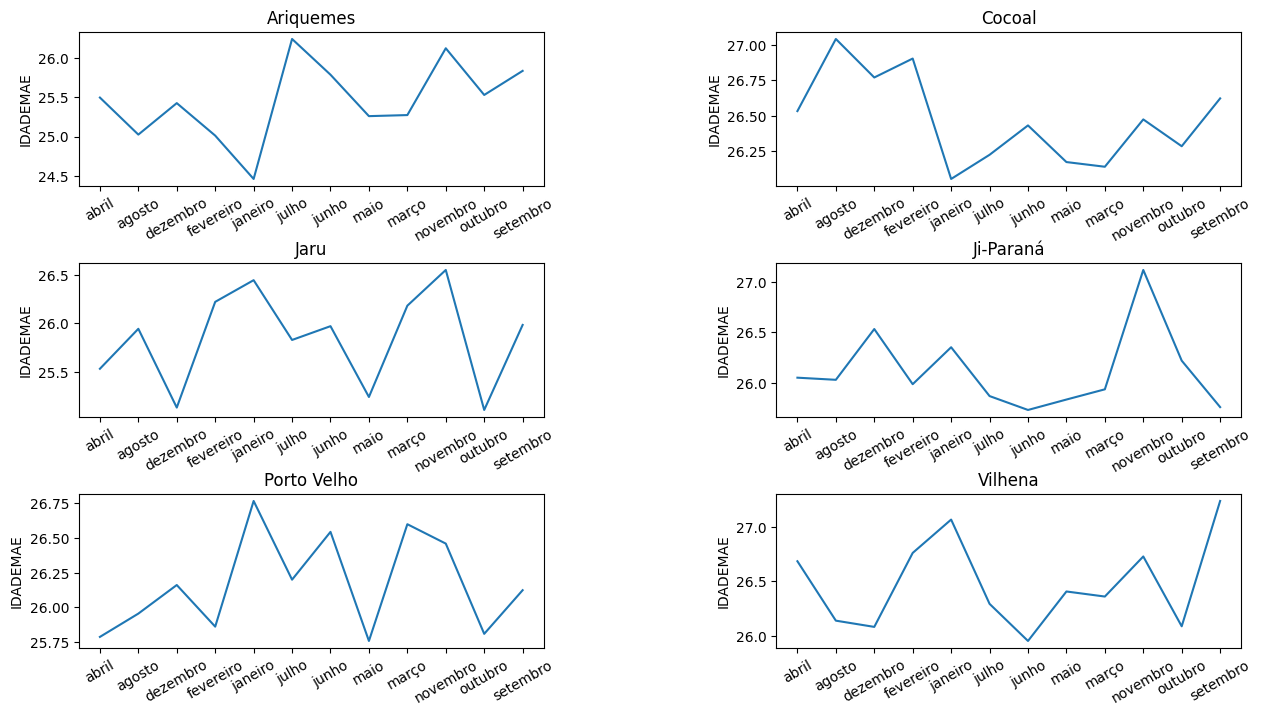

In [54]:
fig, axes = plt.subplots(3,2 ,figsize=(15,8))
grafico = [(axes[0,0], [ariquemes, "Ariquemes"]), 
           (axes[0,1], [cacoal, "Cocoal"]), 
           (axes[1,0], [jaru, "Jaru"]), 
           (axes[1,1], [ji_parana, "Ji-Paraná"]), 
           (axes[2,0], [porto_velho, "Porto Velho"]), 
           (axes[2,1], [vilhena, "Vilhena"])]
for i in grafico:
    sns.lineplot(ax= i[0], x="cat_mes", y='IDADEMAE', data=i[1][0] )
    i[0].tick_params(axis="x", rotation = 30)
    i[0].set_xlabel(None)
    i[0].set_title(i[1][1])
#sns.lineplot(ax = axes[0,0],x="cat_mes", y="IDADEMAE", data=ariquemes)

#axes[0,0].tick_params(axis="x", rotation = 30)
fig.subplots_adjust(wspace=0.5, hspace=0.5)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [55]:

url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"
dfs = pd.read_html(url)



In [56]:
idh = dfs[0]

In [57]:
idh.columns = ["posicao", "municipio", "idh_municipal", "idh_renda", "idh_longevidade", "idh_educacao"]

In [58]:
idh.iloc[0]

posicao            nenhum município
municipio          nenhum município
idh_municipal      nenhum município
idh_renda          nenhum município
idh_longevidade    nenhum município
idh_educacao       nenhum município
Name: 0, dtype: object

In [59]:
idh

,posicao,municipio,idh_municipal,idh_renda,idh_longevidade,idh_educacao
0,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município,nenhum município
1,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto,IDH-M alto
2,1,Porto Velho,0.736,0.764,0.819,0.638
3,2,Vilhena,0.731,0.734,0.808,0.659
4,3,Cacoal,0.718,0.727,0.821,0.620
5,4,Ji-Paraná,0.714,0.728,0.810,0.617
6,5,Pimenta Bueno,0.710,0.726,0.803,0.613
7,6,Ariquemes,0.702,0.716,0.806,0.600
8,7,Rolim de Moura,0.700,0.709,0.808,0.598
9,IDH-M médio,IDH-M médio,IDH-M médio,IDH-M médio,IDH-M médio,IDH-M médio


In [60]:
idh_alto = dict()
for i in idh.iloc[2:9,:]["municipio"]:
    idh_alto[i] = "idh_alto"

In [61]:
idh_medio = dict()
for i in idh.iloc[10:46, :]["municipio"]:
    idh_medio[i] = "idh_medio"

In [62]:
mapping1 = idh_alto | idh_medio

In [63]:
idh.drop([0,1,9, 46, 56, 57], inplace=True)

In [64]:
idh.reset_index(drop=True, inplace=True)

In [65]:
idh["posicao"] = idh["posicao"].astype(int)
idh["idh_municipal"] = idh["idh_municipal"].astype(float)
idh["idh_educacao"] = idh["idh_educacao"].astype(float)
idh["idh_renda"] = idh["idh_renda"].astype(float)
idh["idh_longevidade"] = idh["idh_longevidade"].astype(float)

In [66]:
idh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   posicao          52 non-null     int32  
 1   municipio        52 non-null     object 
 2   idh_municipal    52 non-null     float64
 3   idh_renda        52 non-null     float64
 4   idh_longevidade  52 non-null     float64
 5   idh_educacao     52 non-null     float64
dtypes: float64(4), int32(1), object(1)
memory usage: 2.4+ KB


In [67]:
df1 = idh.copy()

In [68]:
df1.set_index("municipio", inplace=True)

In [69]:
df1.groupby(mapping1)[["idh_municipal", "idh_renda", "idh_longevidade", "idh_educacao"]].aggregate(["mean", "min", "max", "std"])

idh_municipal                         idh_renda                 
                   mean    min    max       std      mean    min    max   
municipio                                                                 
idh_alto       0.715857  0.700  0.736  0.013668  0.729143  0.709  0.764  \
idh_medio      0.643250  0.607  0.692  0.024046  0.652111  0.604  0.691   

                    idh_longevidade                         idh_educacao   
                std            mean    min    max       std         mean   
municipio                                                                  
idh_alto   0.017478        0.810714  0.803  0.821  0.006726     0.620714  \
idh_medio  0.022028        0.790667  0.751  0.825  0.024173     0.517333   

                                   
             min    max       std  
municipio                          
idh_alto   0.598  0.659  0.021538  
idh_medio  0.439  0.602  0.039888

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [70]:

url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"
dfs = pd.read_html(url)


In [71]:
ifdm = dfs[0]

In [72]:
ifdm.columns = ["posicao", "municipio", "ifdm"]

In [73]:
ifdm_moderado = dict()
for i in ifdm.iloc[2:28, :]["municipio"]:
    ifdm_moderado[i] = "ifdm_moderado"

In [74]:
ifdm_regular = dict()
for i in ifdm.iloc[29:55, :]["municipio"]:
    ifdm_moderado[i] = "ifdm_regular"

In [75]:
mapping2 = ifdm_moderado | ifdm_regular

In [76]:
ifdm.drop([0,1, 28, 55, 56], inplace=True)

In [77]:
ifdm.reset_index(drop=True)

,posicao,municipio,ifdm
0,1º,Ariquemes,0.7746
1,2º,Vilhena,0.7465
2,3º,Pimenta Bueno,0.7383
3,4º,Porto Velho,0.7257
4,5º,Ji-Paraná,0.7117
5,6º,Cacoal,0.7111
6,7º,Santa Luzia d'Oeste,0.6850
7,8º,Rolim de Moura,0.6785
8,9º,Chupinguaia,0.6766
9,10º,São Miguel do Guaporé,0.6699


In [79]:
ifdm["ifdm"] = ifdm["ifdm"].astype(float)

In [80]:
ifdm.head(8)

,posicao,municipio,ifdm
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383
5,4º,Porto Velho,0.7257
6,5º,Ji-Paraná,0.7117
7,6º,Cacoal,0.7111
8,7º,Santa Luzia d'Oeste,0.6850
9,8º,Rolim de Moura,0.6785


In [81]:
ifdm.set_index("municipio", inplace=True)

In [82]:
ifdm.groupby(mapping2)[["ifdm"]].aggregate(["mean", "min", "max", "std"])

ifdm                          
                   mean     min     max       std
municipio                                        
ifdm_moderado  0.659919  0.6006  0.7746  0.048485
ifdm_regular   0.556362  0.4562  0.5973  0.034401

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [83]:
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"
dfs = pd.read_html(url)


In [84]:
dfs[0]

Posição                      Município         PIB Alteração
  Em 2019 Mudança (2014)       Município         PIB Alteração
0       1            (0)     Porto Velho  17 912 070       NaN
1       2            (0)       Ji-Paraná   3 783 972       NaN
2       3            (0)         Vilhena   2 831 175       NaN
3       4            (0)       Ariquemes   2 579 830       NaN
4       5            (0)          Cacoal   2 261 644       NaN
5       6            (0)            Jaru   1 500 890       NaN
6       7            (0)  Rolim de Moura   1 283 434       NaN
7       8            (0)   Pimenta Bueno   1 164 877       NaN

In [85]:
pib = pd.concat([dfs[0], dfs[1], dfs[2], dfs[3], dfs[4], dfs[5]])

In [86]:
pib.head()

Posição                   Município         PIB Alteração Posição   
  Em 2019 Mudança (2014)    Município         PIB Alteração Em 2014   
0     1.0            (0)  Porto Velho  17 912 070       NaN     NaN  \
1     2.0            (0)    Ji-Paraná   3 783 972       NaN     NaN   
2     3.0            (0)      Vilhena   2 831 175       NaN     NaN   
3     4.0            (0)    Ariquemes   2 579 830       NaN     NaN   
4     5.0            (0)       Cacoal   2 261 644       NaN     NaN   

                  
  Mudança (2011)  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [87]:
pib.drop(["Posição", "Alteração", "Posição"], axis=1, inplace=True)

C:\Users\carlo\AppData\Local\Temp\ipykernel_2336\1781065838.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pib.drop(["Posição", "Alteração", "Posição"], axis=1, inplace=True)


In [88]:
pib.columns = ["municipio", "pib"]

In [89]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 7
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   municipio  52 non-null     object
 1   pib        52 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [90]:
pib["pib"] = pib["pib"].apply(lambda x: float(x.replace(" ", '')))

In [91]:
pib.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 7
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   municipio  52 non-null     object 
 1   pib        52 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [92]:
pib.reset_index(drop=True)

,municipio,pib
0,Porto Velho,17912070.0
1,Ji-Paraná,3783972.0
2,Vilhena,2831175.0
3,Ariquemes,2579830.0
4,Cacoal,2261644.0
5,Jaru,1500890.0
6,Rolim de Moura,1283434.0
7,Pimenta Bueno,1164877.0
8,Guajará-Mirim,893000.0
9,Ouro Preto do Oeste,834000.0


In [93]:
pib[pib["pib"] >= 10**6]

,municipio,pib
0,Porto Velho,17912070.0
1,Ji-Paraná,3783972.0
2,Vilhena,2831175.0
3,Ariquemes,2579830.0
4,Cacoal,2261644.0
5,Jaru,1500890.0
6,Rolim de Moura,1283434.0
7,Pimenta Bueno,1164877.0


In [94]:
pib.loc[pib["pib"] >= 10**6, "cat_quant"] = "acima 1B"

In [95]:
pib.loc[(pib["pib"] < 10**6) & (pib["pib"] >= 5 * 10**5), "cat_quant"] = "acima 500M"

In [96]:
pib.loc[(pib["pib"] >= 3 * 10**5) & (pib["pib"] < 5 * 10**5), "cat_quant"] = "acima 300M"

In [97]:
pib.loc[(pib["pib"] < 3 * 10**5) & (pib["pib"] >= 2 * 10**5), "cat_quant"] = "acima 200M"

In [98]:
pib.loc[(pib["pib"] < 2 * 10**5) & (pib["pib"] >= 1 * 10**5), "cat_quant"] = "acima 100M"

In [99]:
pib.loc[pib["pib"] < 10**5, "cat_quant"] = "até 100M"

<Axes: xlabel='cat_quant'>

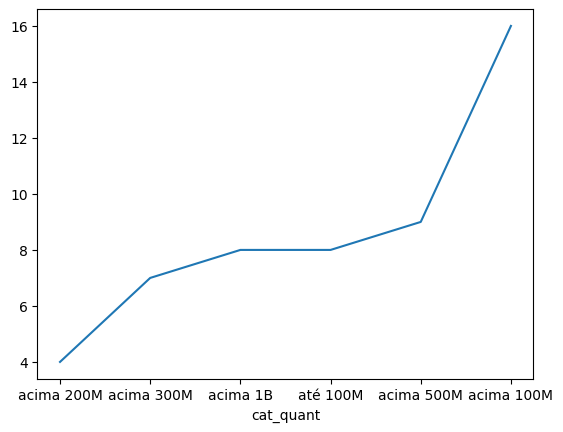

In [100]:
pib.groupby("cat_quant")["pib"].count().sort_values().plot()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [101]:
pib.head()

,municipio,pib,cat_quant
0,Porto Velho,17912070.0,acima 1B
1,Ji-Paraná,3783972.0,acima 1B
2,Vilhena,2831175.0,acima 1B
3,Ariquemes,2579830.0,acima 1B
4,Cacoal,2261644.0,acima 1B


In [102]:
idh.head()

,posicao,municipio,idh_municipal,idh_renda,idh_longevidade,idh_educacao
0,1,Porto Velho,0.736,0.764,0.819,0.638
1,2,Vilhena,0.731,0.734,0.808,0.659
2,3,Cacoal,0.718,0.727,0.821,0.620
3,4,Ji-Paraná,0.714,0.728,0.810,0.617
4,5,Pimenta Bueno,0.710,0.726,0.803,0.613


In [103]:
ifdm.head()

,posicao,ifdm
municipio,,
Ariquemes,1º,0.7746
Vilhena,2º,0.7465
Pimenta Bueno,3º,0.7383
Porto Velho,4º,0.7257
Ji-Paraná,5º,0.7117


In [104]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [107]:
df = sinasc[["IDADEMAE", "ESCMAE", "munResNome", "CONSULTAS", "QTDFILVIVO", "QTDFILMORT"]]

In [117]:
df.head()

,IDADEMAE,ESCMAE,munResNome,CONSULTAS,QTDFILVIVO,QTDFILMORT
0,19,8 a 11 anos,Alta Floresta D'Oeste,4,0.0,0.0
1,29,8 a 11 anos,Alta Floresta D'Oeste,4,1.0,0.0
2,37,8 a 11 anos,Alta Floresta D'Oeste,4,2.0,0.0
3,30,12 anos ou mais,Alto Alegre dos Parecis,3,0.0,0.0
4,30,8 a 11 anos,Alta Floresta D'Oeste,4,1.0,0.0


In [149]:
df.loc[df["ESCMAE"] == "8 a 11 anos"]["munResNome"]

0          Alta Floresta D'Oeste
1          Alta Floresta D'Oeste
2          Alta Floresta D'Oeste
4          Alta Floresta D'Oeste
6        Novo Horizonte do Oeste
                  ...           
27020                    Vilhena
27024                Chupinguaia
27025                    Vilhena
27026                    Vilhena
27027    Novo Horizonte do Oeste
Name: munResNome, Length: 15633, dtype: object

In [178]:
df["ESCMAE"].value_countss()

ESCMAE
8 a 11 anos        15633
12 anos ou mais     5767
4 a 7 anos          4760
1 a 3 anos           516
Nenhuma               40
Name: count, dtype: int64

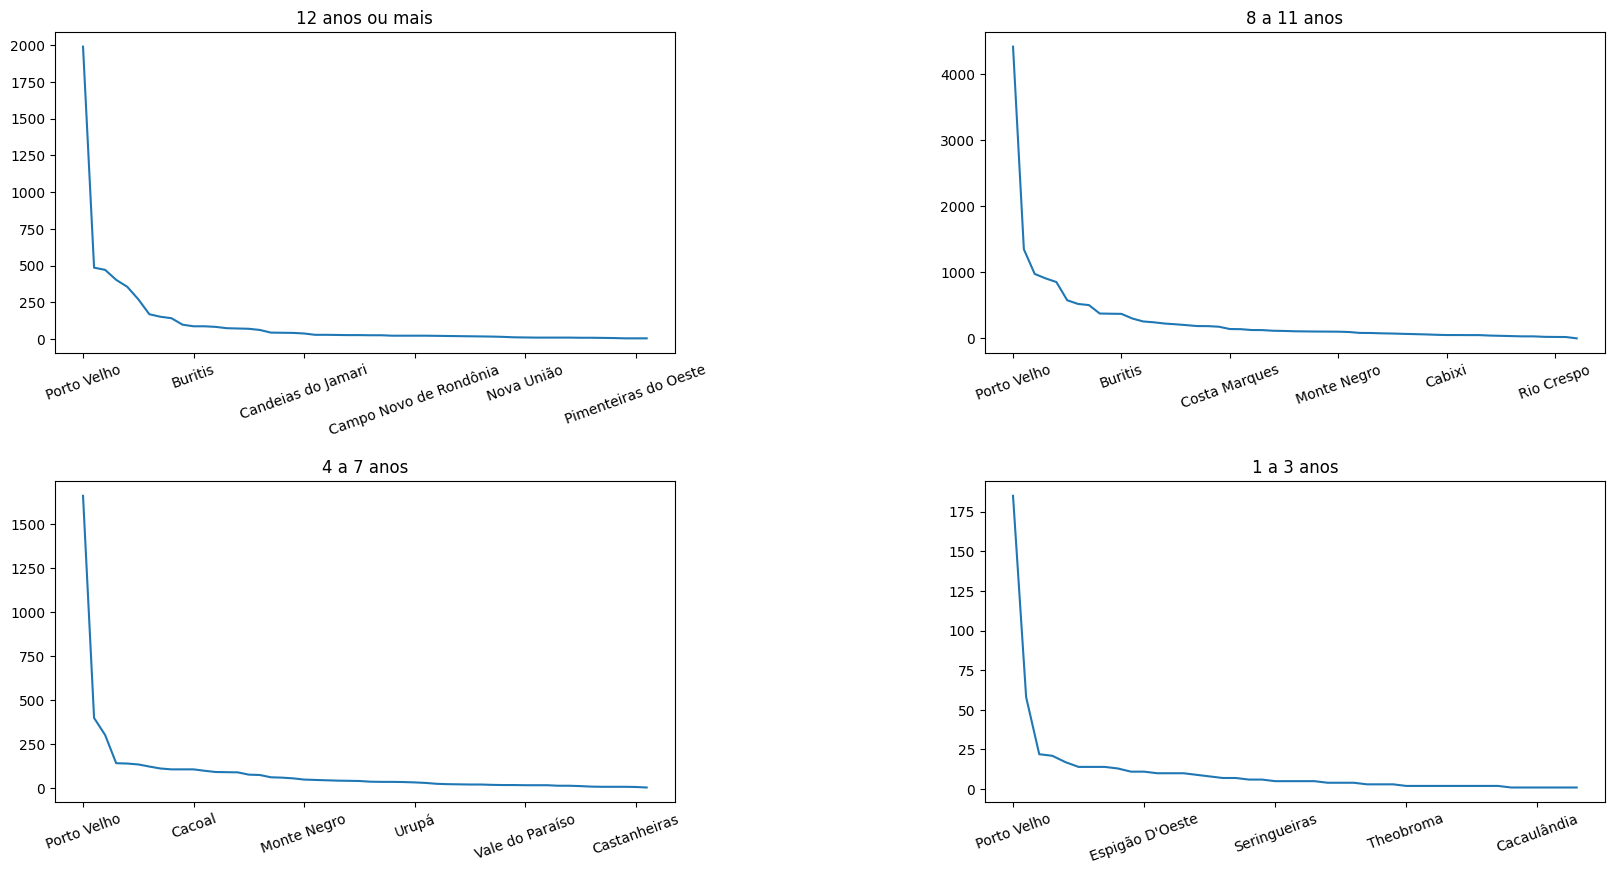

In [228]:
fig, axes = plt.subplots(2,2, figsize=(30,15))
#df.loc[df["ESCMAE"] == "12 anos ou mais"]["munResNome"].value_counts().plot(figsize=(20,6))
df.loc[df["ESCMAE"] == "12 anos ou mais"]["munResNome"].value_counts().plot(figsize=(20,10), ax=axes[0,0], rot=20, title="12 anos ou mais", xlabel="")
df.loc[df["ESCMAE"] == "8 a 11 anos"]["munResNome"].value_counts().plot(figsize=(20,10), ax=axes[0,1], rot=20, title="8 a 11 anos", xlabel="")
df.loc[df["ESCMAE"] == "4 a 7 anos"]["munResNome"].value_counts().plot(figsize=(20,10), ax=axes[1,0], rot=20, title="4 a 7 anos", xlabel="")
df.loc[df["ESCMAE"] == "1 a 3 anos"]["munResNome"].value_counts().plot(figsize=(20,10), ax=axes[1,1], rot=20, title="1 a 3 anos", xlabel="")
#df.loc[df["ESCMAE"] == "Nenhuma"]["munResNome"].value_counts().plot(figsize=(20,10), rot=45, title="Nenhuma escolaridade", xlabel="CIDADES", ax=axes[2,0])

#df.loc[df["ESCMAE"] == "Nenhuma"]["munResNome"].value_counts().plot(figsize=(20,6), ax=axes[1,1], rot=30, title="Nenhuma")

fig.subplots_adjust(wspace=0.5, hspace=0.4)

In [270]:
pib_out = pib.drop(0)

C:\Users\carlo\AppData\Local\Temp\ipykernel_2336\295526576.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(labels=pib["pib"], rotation=0)


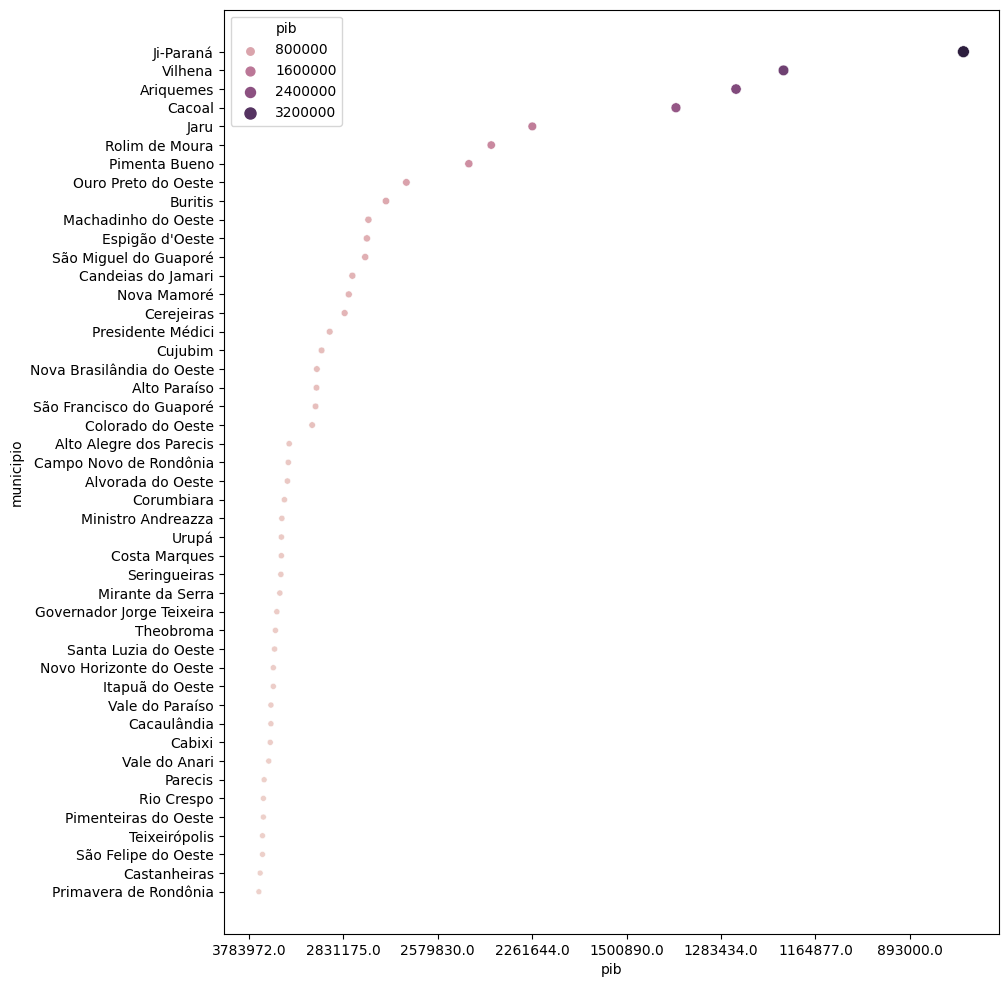

In [271]:
fig, ax = plt.subplots(figsize=(10,12))

p = sns.scatterplot(x="pib", y="municipio", data=pib_out, size="pib", hue="pib")
p.set_xticklabels(labels=pib["pib"], rotation=0)
plt.show()

## Resumo

considerado que Porto Velho(Capital) é um outlier já que é a maior concetração de pessoas em Rondonia. Com as analises e os gráficos que fizemos podemos perceber que conforme o pib da cidade diminue a esolcaridade da mãe também